In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris=load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width 


In [4]:
y = (iris.target == 0).astype(int)

In [5]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [6]:
y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([0])

In [8]:
import tensorflow as tf

In [9]:
import keras as k

In [10]:
fashion_mnist=k.datasets.fashion_mnist

In [11]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
X_train_full.shape



(60000, 28, 28)

In [22]:
y_train_full.shape



(60000,)

In [14]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

In [17]:
model = k.models.Sequential()
model.add(k.layers.Flatten(input_shape=[28, 28]))
model.add(k.layers.Dense(300, activation="relu"))
model.add(k.layers.Dense(100, activation="relu"))
model.add(k.layers.Dense(10, activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 978us/step - loss: 0.7261 - accuracy: 0.7599 - val_loss: 0.5249 - val_accuracy: 0.8130
Epoch 2/30
1719/1719 [==============================] - 2s 905us/step - loss: 0.4901 - accuracy: 0.8308 - val_loss: 0.4599 - val_accuracy: 0.8418
Epoch 3/30
1719/1719 [==============================] - 2s 931us/step - loss: 0.4450 - accuracy: 0.8449 - val_loss: 0.4166 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 2s 944us/step - loss: 0.4176 - accuracy: 0.8532 - val_loss: 0.4024 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 2s 908us/step - loss: 0.3973 - accuracy: 0.8601 - val_loss: 0.3786 - val_accuracy: 0.8740
Epoch 6/30
1719/1719 [==============================] - 2s 931us/step - loss: 0.3806 - accuracy: 0.8665 - val_loss: 0.3868 - val_accuracy: 0.8636
Epoch 7/30
1719/1719 [==============================] - 1s 839us/step - loss: 0.3681 - accuracy: 0.8714 - val_loss: 0.3887 -

(0.0, 1.0)

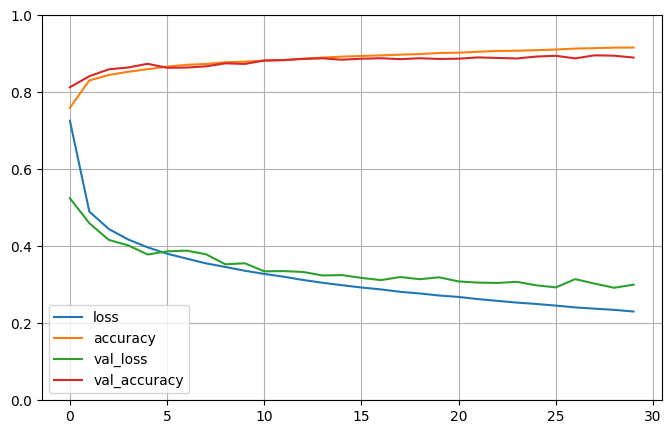

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [25]:
X_new=X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 57ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 0s 493us/step


In [28]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

<h1>Regression using sequential Api<h1>

In [30]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


In [31]:
housing = fetch_california_housing()

In [32]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [34]:
model = k.models.Sequential([
        k.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        k.layers.Dense(1)
    ])

In [35]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 440us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 486us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 505us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 631us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 466us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 438us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 508us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 608us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 465us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [====================

<h1>Regression using functional Api<h1>

In [37]:
input = k.layers.Input(shape=X_train.shape[1:])
hidden1 = k.layers.Dense(30, activation="relu")(input)
hidden2 = k.layers.Dense(30, activation="relu")(hidden1)
concat = k.layers.Concatenate()([input, hidden2])
output = k.layers.Dense(1)(concat)
model = k.models.Model(inputs=[input], outputs=[output])